# Učitavanje neophodnih biblioteka

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb

%matplotlib inline
warnings.filterwarnings("ignore")

# Učitavanje i pregled podataka

In [55]:
df = pd.read_csv("Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [56]:
df.drop(columns=["Unnamed: 0"], axis=0, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Informacije o podacima

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# Statističke informacije

In [58]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Vizuelizacija podataka

## Box-plot

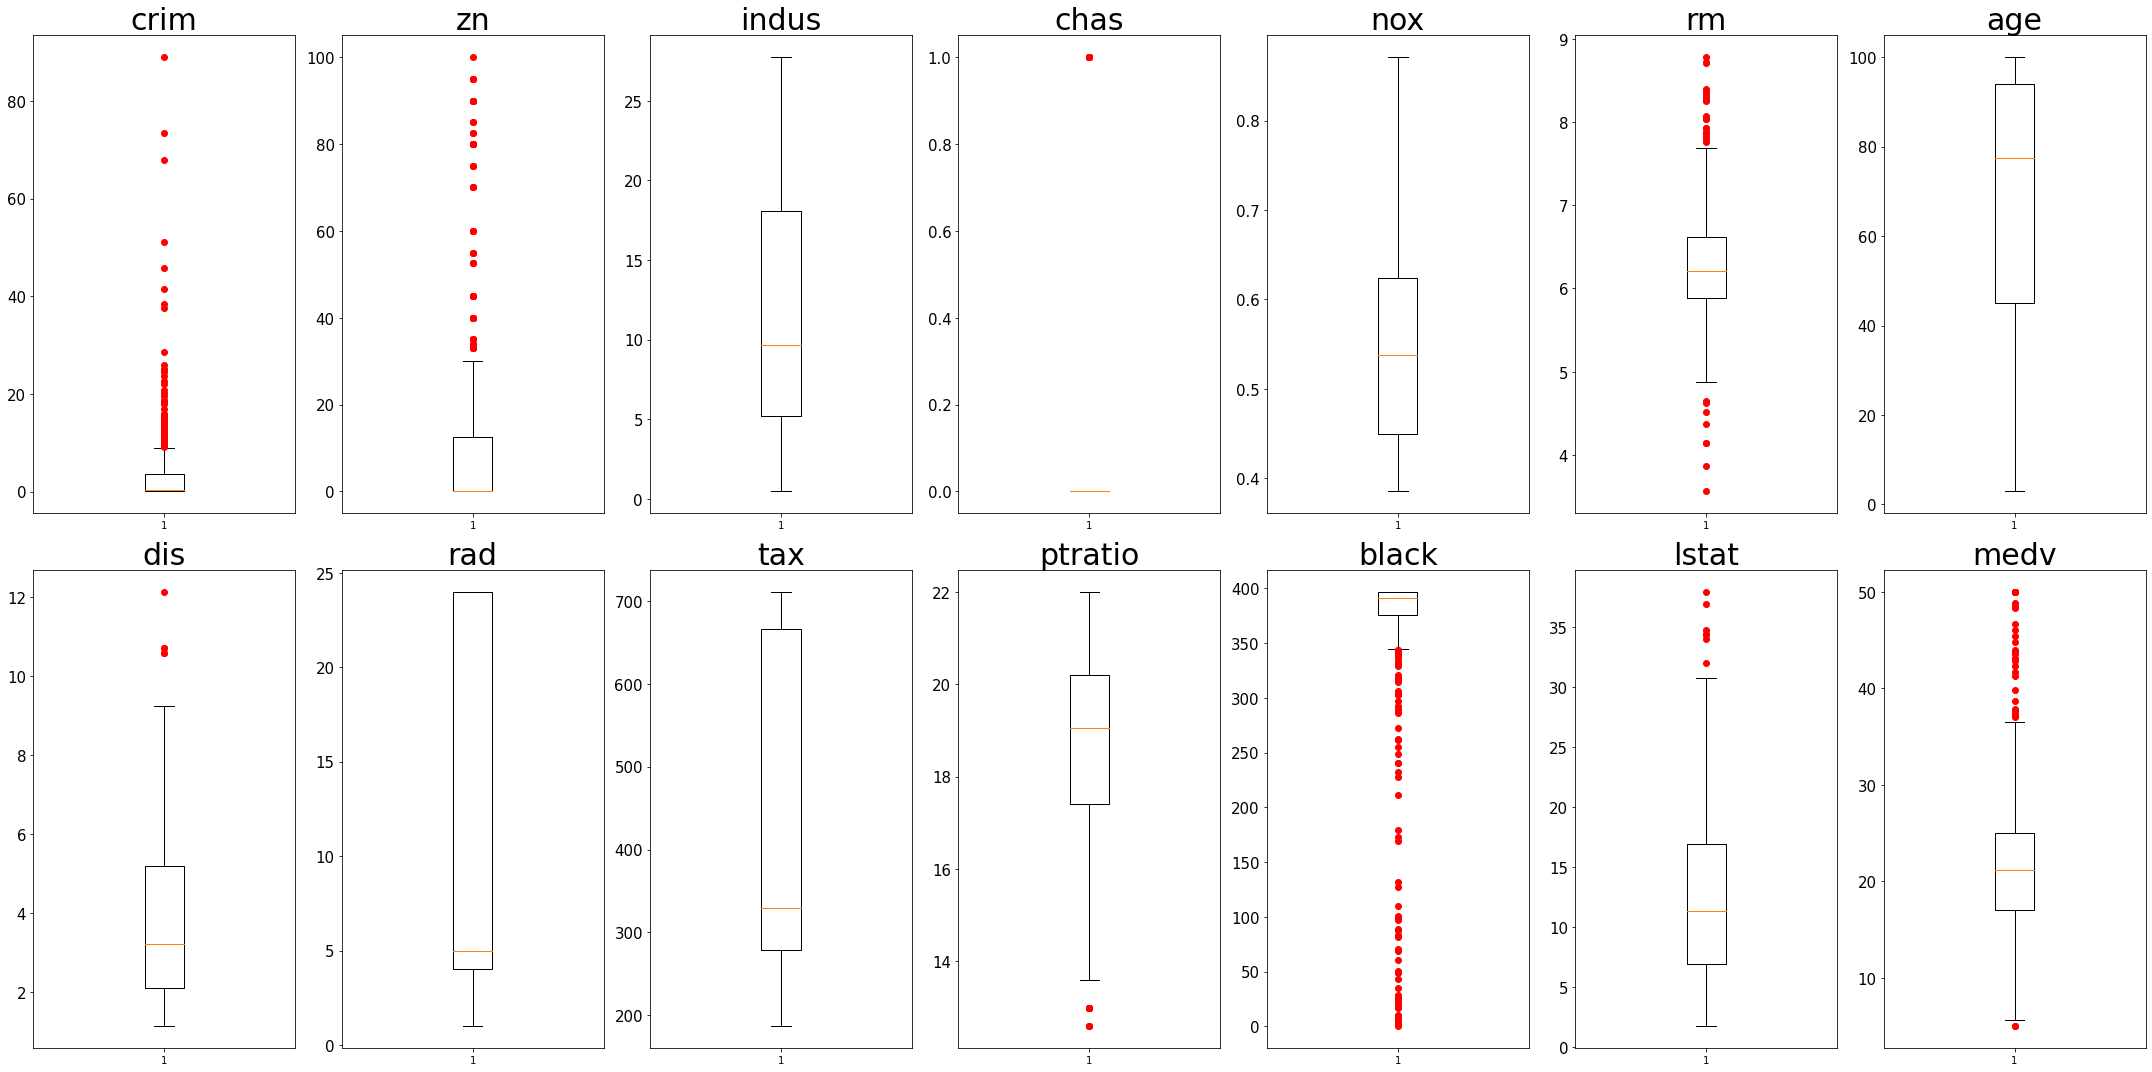

In [59]:
red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="red")

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(30, 15))
for i, ax in enumerate(axes.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    df.iloc[:,i]
    ax.set_title(df.columns[i], fontsize=30)
    ax.tick_params(axis="y", labelsize=15)
    
plt.tight_layout()

## Dist-plot

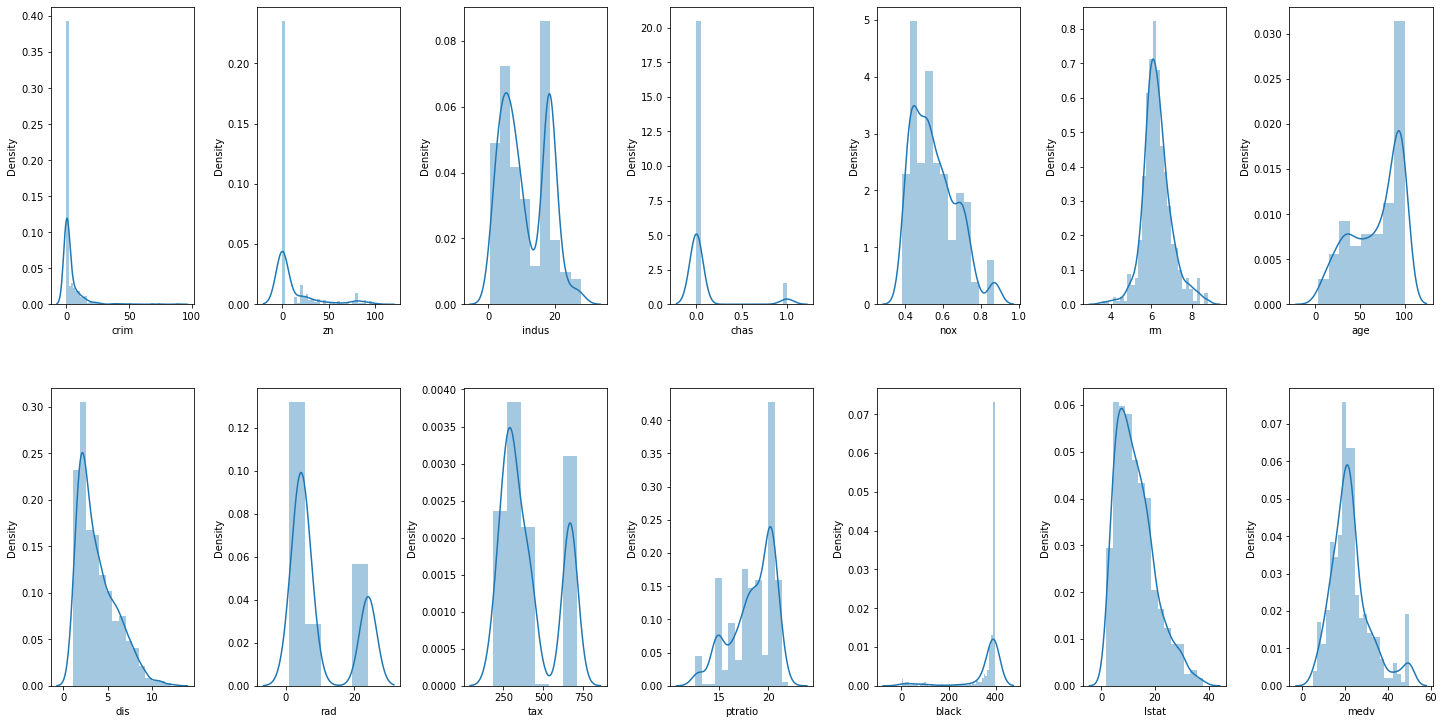

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20,10))
index = 0
ax = axes.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index+=1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Min-max normalizacija

In [61]:
cols = ["crim", "zn", "age", "tax", "black"]
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

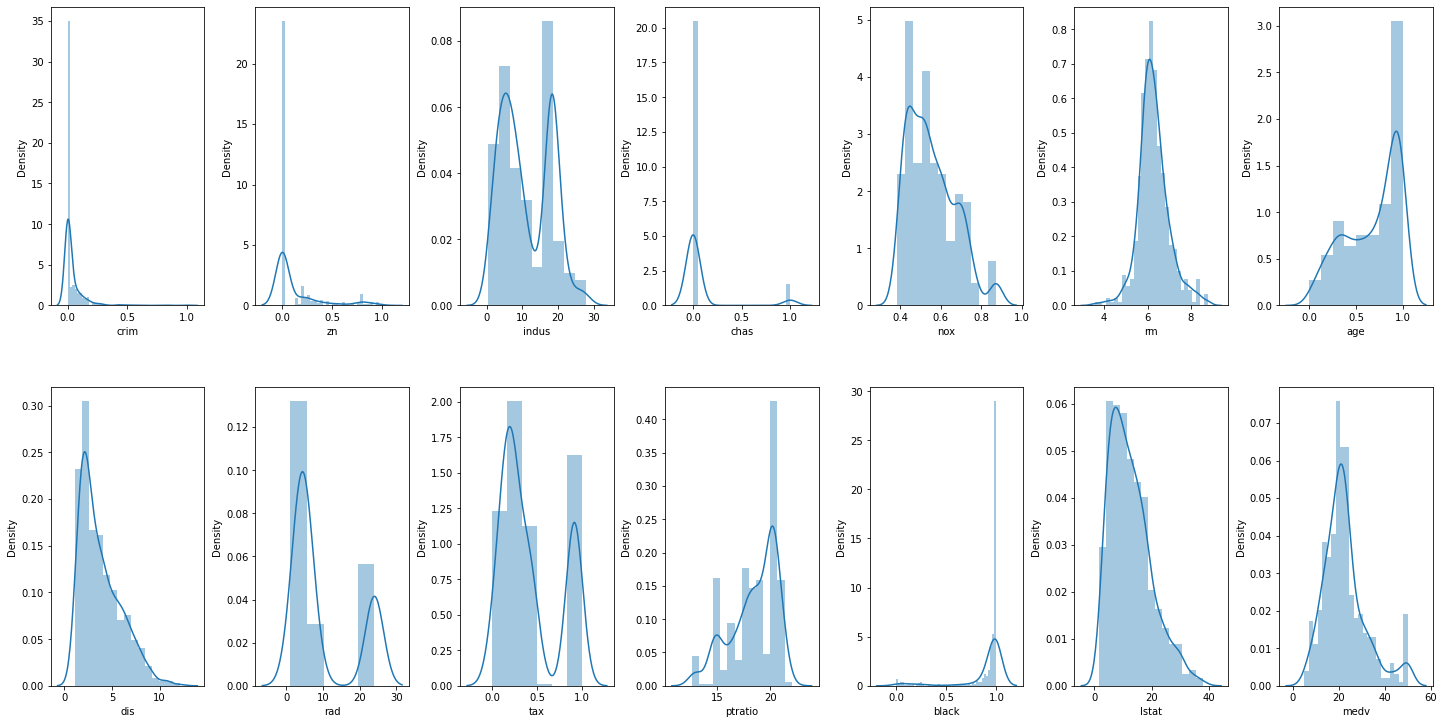

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20,10))
index = 0
ax = axes.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index+=1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Reg-plot

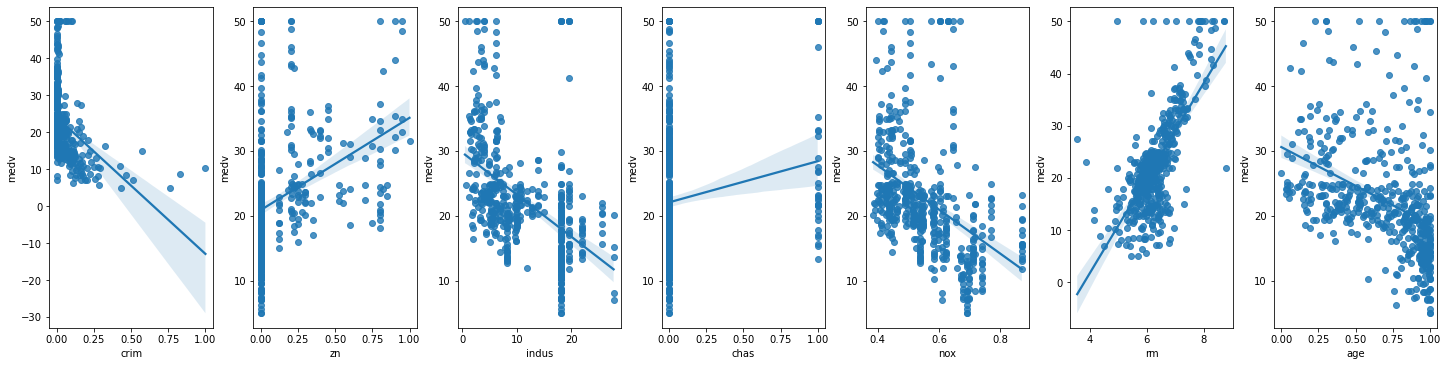

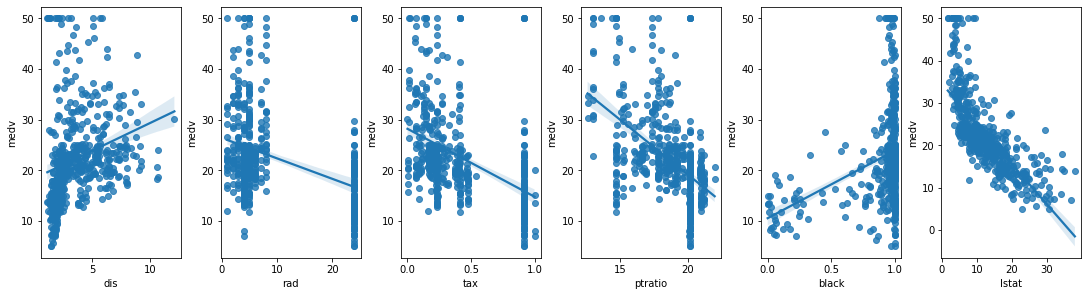

In [63]:
column_names0 = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age']
x0 = df.drop(["medv"], axis = 1)
y0 = df["medv"]

fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(20, 5))
index = 0
ax = axes.flatten()
for i, k in enumerate(column_names0):
    sns.regplot(y=y0, x=x0[k], ax=axes[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


column_names1 = ['dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
x1 = df.drop(["medv"], axis = 1)
y1 = df["medv"]

fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(15, 4))
index = 0
ax = axes.flatten()
for i, k in enumerate(column_names1):
    sns.regplot(y=y1, x=x1[k], ax=axes[i])
plt.tight_layout(pad=0.3, w_pad=0.4, h_pad=3.0)

## Korelaciona matrica

<AxesSubplot:>

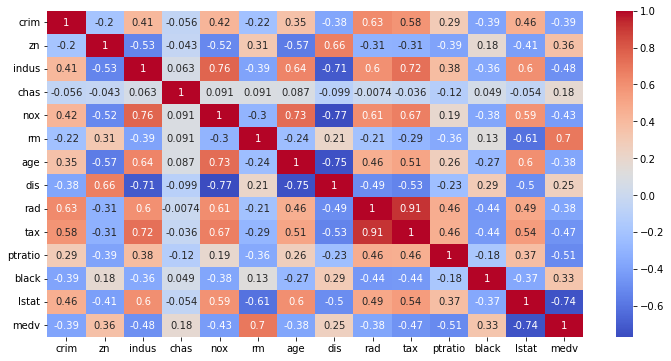

In [64]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

# OLS Regresija

In [65]:
mod0 = ols('medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat', data = df).fit()
anova0 = sm.stats.anova_lm(mod0, type=2)
print(anova0)

             df        sum_sq       mean_sq           F        PR(>F)
crim        1.0   6440.783059   6440.783059  286.030046  6.454140e-51
zn          1.0   3554.336197   3554.336197  157.845240  1.356741e-31
indus       1.0   2551.236435   2551.236435  113.298378  5.953713e-24
chas        1.0   1529.847881   1529.847881   67.939326  1.542886e-15
nox         1.0     76.247648     76.247648    3.386097  6.635054e-02
rm          1.0  10938.116611  10938.116611  485.753048  2.156727e-75
age         1.0     90.267911     90.267911    4.008726  4.581372e-02
dis         1.0   1779.501111   1779.501111   79.026227  1.163840e-17
rad         1.0     34.134323     34.134323    1.515878  2.188325e-01
tax         1.0    329.554069    329.554069   14.635234  1.472406e-04
ptratio     1.0   1309.309339   1309.309339   58.145385  1.266278e-13
black       1.0    593.337564    593.337564   26.349649  4.109280e-07
lstat       1.0   2410.838689   2410.838689  107.063426  7.776912e-23
Residual  492.0  110

In [66]:
print(mod0.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          6.72e-135
Time:                        13:29:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1572      5.078      6.727      0.0

Izbacivanje iz seta podataka regresora koji nisu statistički značajni

In [67]:
df.drop(columns=["indus", "age"], axis=1, inplace=True)
df.head()

,crim,zn,chas,nox,rm,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.18,0,0.538,6.575,4.0900,1,0.208015,15.3,1.000000,4.98,24.0
1,0.000236,0.00,0,0.469,6.421,4.9671,2,0.104962,17.8,1.000000,9.14,21.6
2,0.000236,0.00,0,0.469,7.185,4.9671,2,0.104962,17.8,0.989737,4.03,34.7
3,0.000293,0.00,0,0.458,6.998,6.0622,3,0.066794,18.7,0.994276,2.94,33.4
4,0.000705,0.00,0,0.458,7.147,6.0622,3,0.066794,18.7,1.000000,5.33,36.2


## OLS regresija nakon izuzimanja regresora koji nisu statisticki znacajni

In [68]:
mod1 = ols('medv ~ crim + zn + chas + nox + rm + dis + rad + tax + ptratio + black + lstat', data = df).fit()
anova1 = sm.stats.anova_lm(mod1, type=2)
print(anova1)

             df        sum_sq       mean_sq           F        PR(>F)
crim        1.0   6440.783059   6440.783059  287.125921  4.160491e-51
zn          1.0   3554.336197   3554.336197  158.449997  1.039646e-31
chas        1.0   1233.791018   1233.791018   55.001601  5.281929e-13
nox         1.0   1592.392109   1592.392109   70.987805  3.947261e-16
rm          1.0  12090.956846  12090.956846  539.006995  3.650590e-81
dis         1.0   1122.013878   1122.013878   50.018649  5.233504e-12
rad         1.0     97.530139     97.530139    4.347830  3.756894e-02
tax         1.0    669.324369    669.324369   29.838045  7.455990e-08
ptratio     1.0   1519.747622   1519.747622   67.749361  1.665508e-15
black       1.0    590.572500    590.572500   26.327338  4.148636e-07
lstat       1.0   2723.483726   2723.483726  121.411134  2.140586e-25
Residual  494.0  11081.363952     22.431911         NaN           NaN


In [69]:
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          5.54e-137
Time:                        13:29:48   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1410      5.048      6.763      0.0

Smestanje vrednositi regresora u x, i zavisne promenljive u y

In [70]:
x = df.drop(["medv"], axis = 1)
y = df["medv"]

Kreiranje i trening linearnog modela za predvidjanje

In [71]:
lm0 = LinearRegression()
lm0.fit(x, y)

LinearRegression()

In [72]:
# Koeficijent zavisne promenljive
lm0.intercept_

34.14095186434517

In [73]:
# Koeficijenti regresora
coefficients = pd.DataFrame([x.columns, lm0.coef_]).T
coefficients = coefficients.rename(columns = {0: "Regressors", 1: "Coefficients"})
coefficients

,Regressors,Coefficients
0,crim,-9.645522
1,zn,4.584493
2,chas,2.718716
3,nox,-17.376023
4,rm,3.801579
5,dis,-1.492711
6,rad,0.299608
7,tax,-6.171658
8,ptratio,-0.946525
9,black,3.684563


Podela uzorka na trening i test uzorak

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [75]:
lm1 = LinearRegression()
lm1.fit(x_train, y_train)

LinearRegression()

In [76]:
lm1.intercept_

30.319226145440005

In [77]:
coefficients = pd.DataFrame([x.columns, lm1.coef_]).T
coefficients = coefficients.rename(columns = {0: "Regressors", 1: "Coefficients"})
coefficients

,Regressors,Coefficients
0,crim,-11.983225
1,zn,3.553453
2,chas,3.167579
3,nox,-15.3744
4,rm,3.950963
5,dis,-1.363138
6,rad,0.232298
7,tax,-3.904776
8,ptratio,-0.907145
9,black,4.602622


Predvidjanje trening podataka

In [78]:
y_pred = lm1.predict(x_train)

In [79]:
r2_train = metrics.r2_score(y_train, y_pred)
print("R^2: ", r2_train)
print("Adjusted R^2: ", 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - x_train.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(y_train, y_pred))
print("MSE: ", metrics.mean_squared_error(y_train, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2:  0.742828888425931
Adjusted R^2:  0.7345573029659462
MAE:  3.36569175910762
MSE:  22.604448172809246
RMSE:  4.754413546675262


Evaluacija modela na test podacima

In [80]:
y_test_pred = lm1.predict(x_test)

In [81]:
r2_test = metrics.r2_score(y_test, y_test_pred)
print("R^2: ", r2_test)
print("Adjusted R^2: ", 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2:  0.714903934890736
Adjusted R^2:  0.6925035297750082
MAE:  3.113787289886374
MSE:  21.243390345509425
RMSE:  4.6090552552024615


## Decision Tree Regressor

Kreiranje i trening modela za predvidjanje

In [82]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

Feature importance

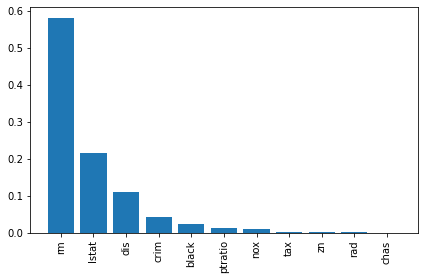

In [83]:
feature_importances_dtr = dtr.feature_importances_
sorted_indices = np.argsort(feature_importances_dtr)[::-1]
plt.bar(range(x_train.shape[1]), feature_importances_dtr[sorted_indices])
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()

Predvidjanje trening podataka

In [84]:
y_pred = dtr.predict(x_train)

In [85]:
r2_train = metrics.r2_score(y_train, y_pred)
print("R^2: ", r2_train)
print("Adjusted R^2: ", 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - x_train.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(y_train, y_pred))
print("MSE: ", metrics.mean_squared_error(y_train, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2:  1.0
Adjusted R^2:  1.0
MAE:  0.0
MSE:  0.0
RMSE:  0.0



Evaluacija modela na test podacima

In [86]:
y_test_pred = dtr.predict(x_test)

In [87]:
r2_test = metrics.r2_score(y_test, y_test_pred)
print("R^2: ", r2_test)
print("Adjusted R^2: ", 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2:  0.720679618029923
Adjusted R^2:  0.698733016589417
MAE:  2.8907894736842104
MSE:  20.81302631578947
RMSE:  4.56212958121418


## Random Forest Regressor

Kreiranje i trening modela za predvidjanje

In [88]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

Feature importance

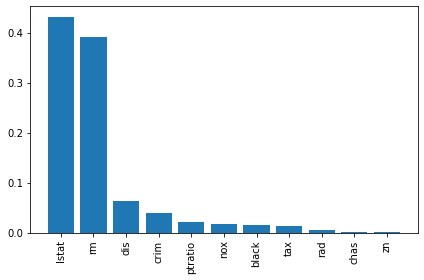

In [89]:
feature_importances_rfr = rfr.feature_importances_
sorted_indices = np.argsort(feature_importances_rfr)[::-1]
plt.bar(range(x_train.shape[1]), feature_importances_rfr[sorted_indices])
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()

Predvidjanje trening podataka

In [90]:
y_pred = rfr.predict(x_train)

In [91]:
r2_train = metrics.r2_score(y_train, y_pred)
print("R^2: ", r2_train)
print("Adjusted R^2: ", 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - x_train.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(y_train, y_pred))
print("MSE: ", metrics.mean_squared_error(y_train, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2:  0.9755647335549309
Adjusted R^2:  0.9747788039324287
MAE:  0.9469689265536708
MSE:  2.1477751158192078
RMSE:  1.465528954275284


Evaluacija modela na test podacima

In [92]:
y_test_pred = rfr.predict(x_test)

In [93]:
r2_test = metrics.r2_score(y_test, y_test_pred)
print("R^2: ", r2_test)
print("Adjusted R^2: ", 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2:  0.865066676115513
Adjusted R^2:  0.8544647720960176
MAE:  2.0856842105263156
MSE:  10.054299657894731
RMSE:  3.170851566676487


## Extra Trees Regressor

Kreiranje i trening linearnog modela za predvidjanje

In [94]:
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)

ExtraTreesRegressor()

Feature Importance

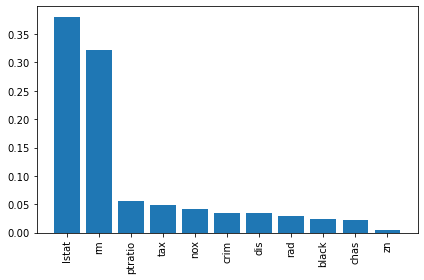

In [95]:
feature_importances_etr = etr.feature_importances_
sorted_indices = np.argsort(feature_importances_etr)[::-1]
plt.bar(range(x_train.shape[1]), feature_importances_etr[sorted_indices])
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()

Predvidjanje trening podataka

In [96]:
y_pred = etr.predict(x_train)

In [97]:
r2_train = metrics.r2_score(y_train, y_pred)
print("R^2: ", r2_train)
print("Adjusted R^2: ", 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - x_train.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(y_train, y_pred))
print("MSE: ", metrics.mean_squared_error(y_train, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2:  1.0
Adjusted R^2:  1.0
MAE:  2.4826343115629208e-14
MSE:  1.1082180950179847e-27
RMSE:  3.328990980789802e-14


Evaluacija modela na test podacima

In [98]:
y_test_pred = etr.predict(x_test)

In [99]:
r2_test = metrics.r2_score(y_test, y_test_pred)
print("R^2: ", r2_test)
print("Adjusted R^2: ", 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2:  0.8631947674333771
Adjusted R^2:  0.852445784874571
MAE:  2.0147368421052634
MSE:  10.193781368421051
RMSE:  3.1927701715627843


## XGB Regressor

Kreiranje i trening linearnog modela za predvidjanje

In [100]:
xgb = xgb.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Feature Importance

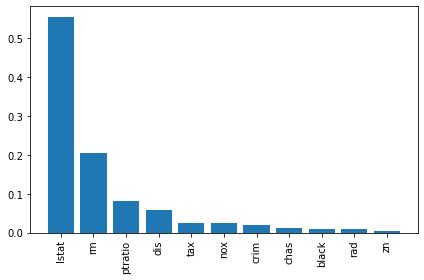

In [101]:
feature_importances_xgb = xgb.feature_importances_
sorted_indices = np.argsort(feature_importances_xgb)[::-1]
plt.bar(range(x_train.shape[1]), feature_importances_xgb[sorted_indices])
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()

Predvidjanje trening podataka

In [102]:
y_pred = xgb.predict(x_train)

In [103]:
r2_train = metrics.r2_score(y_train, y_pred)
print("R^2: ", r2_train)
print("Adjusted R^2: ", 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - x_train.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(y_train, y_pred))
print("MSE: ", metrics.mean_squared_error(y_train, y_pred))
# print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred))
# toliko je niska vrednost MSE<0 da kada se korenuje dobije se jos manja vrednost, zato je MSE<MAE

R^2:  0.9999944929762352
Adjusted R^2:  0.9999943158497399
MAE:  0.015250870602278987
MSE:  0.00048404827632196476


Evaluacija modela na test podacima

In [104]:
y_test_pred = xgb.predict(x_test)

In [105]:
r2_test = metrics.r2_score(y_test, y_test_pred)
print("R^2: ", r2_test)
print("Adjusted R^2: ", 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2:  0.8876769112532812
Adjusted R^2:  0.8788515257088961
MAE:  2.0556964748784115
MSE:  8.369541046262274
RMSE:  2.893015908401175
